In [95]:
import pandas as pd
import pymysql as pm
import numpy as np

In [96]:
try:
    connection = pm.connect(host='localhost',
                             user='root',
                             password='Tashe@1129',
                           database='faostat')

    print("Connection successful to server MySQL")
    
except:
    print("Connection to database failed")

Connection successful to server MySQL


In [97]:
query = '''SELECT pi.Year_code,pi.Years,c.*,p.*,ca.Category,ca.Sub_category,pi.Information_code,
            pi.Information,pi.Total_value FROM category ca
            INNER JOIN product p USING (Category_code)
            INNER JOIN (SELECT product_information.*,years.Years,information.Information FROM information  
                        INNER JOIN product_information  USING (Information_code)
                        INNER JOIN years  USING (Year_code)) pi USING (Product_code)
            INNER JOIN country c USING (Area_code)'''
df_produits = pd.read_sql(query,connection)
df_produits

,Year_code,Years,Area_code,Area,Product_code,Product,Category_code,Category,Sub_category,Information_code,Information,Total_value
0,2018,2018,1,Armenia,2531,"""Potatoes and products""",1,Vegetal product,General,645,Food supply quantity (kg/capita/yr),34.19
1,2018,2018,1,Armenia,2531,"""Potatoes and products""",1,Vegetal product,General,664,Food supply (kcal/capita/day),64.00
2,2018,2018,1,Armenia,2531,"""Potatoes and products""",1,Vegetal product,General,674,Protein supply quantity (g/capita/day),1.50
3,2018,2018,1,Armenia,2531,"""Potatoes and products""",1,Vegetal product,General,684,Fat supply quantity (g/capita/day),0.09
4,2018,2018,1,Armenia,2531,"""Potatoes and products""",1,Vegetal product,General,5072,Stock Variation,-50.00
...,...,...,...,...,...,...,...,...,...,...,...,...
909980,2014,2014,5000,World,2516,"""Oats""",3,Vegetal Product,Cereal,5511,Production,22826.00
909981,2014,2014,5000,World,2517,"""Millet and products""",3,Vegetal Product,Cereal,5511,Production,28316.00
909982,2014,2014,5000,World,2518,"""Sorghum and products""",3,Vegetal Product,Cereal,5511,Production,66981.00
909983,2014,2014,5000,World,2520,"""Cereals, Other""",3,Vegetal Product,Cereal,5511,Production,31628.00


In [98]:
query = '''SELECT y.*,c.*,p.Unit,p.Total_value FROM country c
                INNER JOIN population p ON  c.Area_code=p.Area_code
                INNER JOIN years y ON p.Year_code=y.Year_code'''
df_population = pd.read_sql(query,connection)
df_population

,Year_code,Years,Area_code,Area,Unit,Total_value
0,2018,2018,1,Armenia,1000 persons,2951.75
1,2017,2017,1,Armenia,1000 persons,2944.79
2,2016,2016,1,Armenia,1000 persons,2936.14
3,2015,2015,1,Armenia,1000 persons,2925.55
4,2014,2014,1,Armenia,1000 persons,2912.41
...,...,...,...,...,...,...
1180,2018,2018,351,China,1000 persons,1459380.00
1181,2017,2017,351,China,1000 persons,1452630.00
1182,2016,2016,351,China,1000 persons,1445520.00
1183,2015,2015,351,China,1000 persons,1438190.00


In [99]:
query = '''SELECT y.*,c.*,u.Years_considered,u.Unit,u.Total_value FROM country c
                INNER JOIN undernourished u ON  c.Area_code=u.Area_code
                INNER JOIN years y ON u.Year_code=y.Year_code'''
df_undernourished = pd.read_sql(query,connection)
df_undernourished 

,Year_code,Years,Area_code,Area,Years_considered,Unit,Total_value
0,2014,2014,1,Armenia,"""2013,2014,2015""",millions,0.1
1,2014,2014,2,Afghanistan,"""2013,2014,2015""",millions,8.8
2,2014,2014,3,Albania,"""2013,2014,2015""",millions,0.1
3,2014,2014,4,Algeria,"""2013,2014,2015""",millions,1.3
4,2014,2014,7,Angola,"""2013,2014,2015""",millions,6.2
...,...,...,...,...,...,...,...
514,2018,2018,236,Venezuela (Bolivarian Republic of),"""2017,2018,2019""",millions,9.1
515,2018,2018,237,Viet Nam,"""2017,2018,2019""",millions,6.1
516,2018,2018,238,Ethiopia,"""2017,2018,2019""",millions,21.5
517,2018,2018,272,Serbia,"""2017,2018,2019""",millions,0.4


In [100]:
connection.close()

### calculer la population modiale

In [101]:
df_population.groupby('Years')['Total_value'].sum()

Years
2014    8726222.991
2015    8818254.598
2016    8909815.651
2017    9000765.241
2018    9090747.808
Name: Total_value, dtype: float64

In [102]:
df_population[(df_population['Area'].str.contains('china',case=False)) & (df_population['Area']!='China')]

,Year_code,Years,Area_code,Area,Unit,Total_value
175,2018,2018,41,"China, mainland",1000 persons,1427650.000
176,2017,2017,41,"China, mainland",1000 persons,1421020.000
177,2016,2016,41,"China, mainland",1000 persons,1414050.000
178,2015,2015,41,"China, mainland",1000 persons,1406850.000
179,2014,2014,41,"China, mainland",1000 persons,1399450.000
405,2018,2018,96,"China, Hong Kong SAR",1000 persons,7371.730
406,2017,2017,96,"China, Hong Kong SAR",1000 persons,7306.320
407,2016,2016,96,"China, Hong Kong SAR",1000 persons,7243.540
408,2015,2015,96,"China, Hong Kong SAR",1000 persons,7186.000
409,2014,2014,96,"China, Hong Kong SAR",1000 persons,7134.670


In [103]:
#Drop China states from population
df_population.drop(df_population[(df_population['Area'].str.contains('china',case=False)) & (df_population['Area']!='China')].index,inplace=True)

In [104]:
df_population.groupby('Years')['Total_value'].sum()

Years
2014    7295556.113
2015    7380059.013
2016    7464291.075
2017    7548141.836
2018    7631367.942
Name: Total_value, dtype: float64

In [105]:
#Drop China states from undernourished for futher purposes
df_undernourished.drop(df_undernourished [(df_undernourished['Area'].str.contains('china',case=False)) & (df_undernourished ['Area']!='China')].index,inplace=True)

## Transform g to kg , per day to per year

In [106]:
df_produits

,Year_code,Years,Area_code,Area,Product_code,Product,Category_code,Category,Sub_category,Information_code,Information,Total_value
0,2018,2018,1,Armenia,2531,"""Potatoes and products""",1,Vegetal product,General,645,Food supply quantity (kg/capita/yr),34.19
1,2018,2018,1,Armenia,2531,"""Potatoes and products""",1,Vegetal product,General,664,Food supply (kcal/capita/day),64.00
2,2018,2018,1,Armenia,2531,"""Potatoes and products""",1,Vegetal product,General,674,Protein supply quantity (g/capita/day),1.50
3,2018,2018,1,Armenia,2531,"""Potatoes and products""",1,Vegetal product,General,684,Fat supply quantity (g/capita/day),0.09
4,2018,2018,1,Armenia,2531,"""Potatoes and products""",1,Vegetal product,General,5072,Stock Variation,-50.00
...,...,...,...,...,...,...,...,...,...,...,...,...
909980,2014,2014,5000,World,2516,"""Oats""",3,Vegetal Product,Cereal,5511,Production,22826.00
909981,2014,2014,5000,World,2517,"""Millet and products""",3,Vegetal Product,Cereal,5511,Production,28316.00
909982,2014,2014,5000,World,2518,"""Sorghum and products""",3,Vegetal Product,Cereal,5511,Production,66981.00
909983,2014,2014,5000,World,2520,"""Cereals, Other""",3,Vegetal Product,Cereal,5511,Production,31628.00


In [107]:
#Transform the per day details to per year (*365)
df_produits.Total_value = np.where(df_produits.Information.str.contains("kcal"),df_produits.Total_value*365,df_produits.Total_value)
df_produits.Total_value = np.where(df_produits.Information.str.contains("Fat"),df_produits.Total_value*365,df_produits.Total_value)
df_produits.Total_value = np.where(df_produits.Information.str.contains("Protein"),df_produits.Total_value*365,df_produits.Total_value)

In [108]:
#Transform g to kg (/1000)
df_produits.Total_value = np.where(df_produits.Information.str.contains("Fat"),df_produits.Total_value/1000,df_produits.Total_value)
df_produits.Total_value = np.where(df_produits.Information.str.contains("Protein"),df_produits.Total_value/1000,df_produits.Total_value)

In [109]:
#Change information
df_produits['Information'] = np.where(df_produits.Information.str.contains("kcal"),"Food supply (kcal/capita/yr)",df_produits.Information)
df_produits['Information'] = np.where(df_produits.Information.str.contains("Fat"),"Fat supply quantity (kg/capita/yr)",df_produits.Information)
df_produits['Information'] = np.where(df_produits.Information.str.contains("Protein"),"Protein supply quantity (kg/capita/yr)",df_produits.Information)

In [110]:
df_produits

,Year_code,Years,Area_code,Area,Product_code,Product,Category_code,Category,Sub_category,Information_code,Information,Total_value
0,2018,2018,1,Armenia,2531,"""Potatoes and products""",1,Vegetal product,General,645,Food supply quantity (kg/capita/yr),34.19000
1,2018,2018,1,Armenia,2531,"""Potatoes and products""",1,Vegetal product,General,664,Food supply (kcal/capita/yr),23360.00000
2,2018,2018,1,Armenia,2531,"""Potatoes and products""",1,Vegetal product,General,674,Protein supply quantity (kg/capita/yr),0.54750
3,2018,2018,1,Armenia,2531,"""Potatoes and products""",1,Vegetal product,General,684,Fat supply quantity (kg/capita/yr),0.03285
4,2018,2018,1,Armenia,2531,"""Potatoes and products""",1,Vegetal product,General,5072,Stock Variation,-50.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
909980,2014,2014,5000,World,2516,"""Oats""",3,Vegetal Product,Cereal,5511,Production,22826.00000
909981,2014,2014,5000,World,2517,"""Millet and products""",3,Vegetal Product,Cereal,5511,Production,28316.00000
909982,2014,2014,5000,World,2518,"""Sorghum and products""",3,Vegetal Product,Cereal,5511,Production,66981.00000
909983,2014,2014,5000,World,2520,"""Cereals, Other""",3,Vegetal Product,Cereal,5511,Production,31628.00000


### calculer la proportion des céréales pour l’alimentation animale

In [111]:
#Drop China states from products
df_produits.drop(df_produits[(df_produits['Area'].str.contains('china',case=False)) & (df_produits['Area']!='China')].index,inplace=True)

In [112]:
cereal_total = df_produits[(df_produits['Sub_category']=='Cereal')&(df_produits['Area']=='World')].groupby('Years')['Total_value'].sum()
cereal_total

Years
2014    2813281.0
2015    2842396.0
2016    2927730.0
2017    2982404.0
2018    2918298.0
Name: Total_value, dtype: float64

In [113]:
cereal_feed = df_produits[(df_produits['Sub_category']=='Cereal') & (df_produits['Information']=='Feed')&(df_produits['Area']!='World')].groupby('Years')['Total_value'].sum()
cereal_feed

Years
2014    849308.0
2015    903895.0
2016    921887.0
2017    945984.0
2018    949610.0
Name: Total_value, dtype: float64

In [114]:
prop_cereal_feed = (cereal_feed*100)/cereal_total
round(prop_cereal_feed,2)

Years
2014    30.19
2015    31.80
2016    31.49
2017    31.72
2018    32.54
Name: Total_value, dtype: float64

In [115]:
#Pivot the table to easy calculate

In [116]:
df_produits_temp = df_produits[['Years','Area','Product','Category','Sub_category','Information','Total_value']]
df_produits_temp = df_produits_temp.pivot(index=['Years','Area','Product','Category','Sub_category'],columns=['Information'],values=['Total_value'])
df_produits_temp

Total_value  \
Information                                                            Domestic supply quantity   
Years Area        Product                 Category        Sub_category                            
2014  Afghanistan "Alcohol, Non-Food"     Vegetal product General                          -0.0   
                  "Apples and products"   Vegetal product General                          71.0   
                  "Bananas"               Vegetal product General                          64.0   
                  "Barley and products"   Vegetal Product Cereal                          507.0   
                  "Beans"                 Vegetal product General                         -10.0   
...                                                                                         ...   
2018  Zimbabwe    "Tea (including mate)"  Vegetal product General                          11.0   
                  "Tomatoes and products" Vegetal product General                          27.0   
                  "Vegetables, Other"     Vegetal product General                         215.0   
                  "Wheat and products"    Vegetal Product Cereal                          301.0   
                  "Wine"                  Vegetal product General                           4.0   

                                                                                        \
Information                                                            Export Quantity   
Years Area        Product                 Category        Sub_category                   
2014  Afghanistan "Alcohol, Non-Food"     Vegetal product General                  0.0   
                  "Apples and products"   Vegetal product General                 13.0   
                  "Bananas"               Vegetal product General                  0.0   
                  "Barley and products"   Vegetal Product Cereal                   0.0   
                  "Beans"                 Vegetal product General                 10.0   
...                                                                                ...   
2018  Zimbabwe    "Tea (including mate)"  Vegetal product General                 14.0   
                  "Tomatoes and products" Vegetal product General                  0.0   
                  "Vegetables, Other"     Vegetal product General                  5.0   
                  "Wheat and products"    Vegetal Product Cereal                   3.0   
                  "Wine"                  Vegetal product General                  0.0   

                                                                                                           \
Information                                                            Fat supply quantity (kg/capita/yr)   
Years Area        Product                 Category        Sub_category                                      
2014  Afghanistan "Alcohol, Non-Food"     Vegetal product General                                     NaN   
                  "Apples and products"   Vegetal product General                                 0.00365   
                  "Bananas"               Vegetal product General                                 0.00730   
                  "Barley and products"   Vegetal Product Cereal                                  0.05110   
                  "Beans"                 Vegetal product General                                     NaN   
...                                                                                                   ...   
2018  Zimbabwe    "Tea (including mate)"  Vegetal product General                                 0.00000   
                  "Tomatoes and products" Vegetal product General                                 0.00365   
                  "Vegetables, Other"     Vegetal product General                                 0.02920   
                  "Wheat and products"    Vegetal Product Cereal                                  0.21900   
                  "

In [117]:
df_produits_temp.fillna(0,inplace=True)

In [118]:
df_produits_temp = df_produits_temp.reset_index()
df_produits_temp.columns = ['Years','Area','Product','Category','Sub_category','Domestic supply quantity','Export Quantity',
                           'Fat supply quantity (kg/capita/yr)','Feed','Food','Food supply (kcal/capita/yr)','Food supply quantity (kg/capita/yr)',
                           'Import Quantity','Losses','Other uses (non-food)','Processing','Production','Protein supply quantity (kg/capita/yr)',
                           'Residuals','Seed','Stock Variation','Tourist consumption']
df_produits_temp 

,Years,Area,Product,Category,Sub_category,Domestic supply quantity,Export Quantity,Fat supply quantity (kg/capita/yr),Feed,Food,...,Import Quantity,Losses,Other uses (non-food),Processing,Production,Protein supply quantity (kg/capita/yr),Residuals,Seed,Stock Variation,Tourist consumption
0,2014,Afghanistan,"""Alcohol, Non-Food""",Vegetal product,General,-0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,2014,Afghanistan,"""Apples and products""",Vegetal product,General,71.0,13.0,0.00365,0.0,64.0,...,45.0,7.0,0.0,0.0,89.0,0.00730,0.0,0.0,51.0,0.0
2,2014,Afghanistan,"""Bananas""",Vegetal product,General,64.0,0.0,0.00730,0.0,64.0,...,64.0,0.0,0.0,0.0,0.0,0.01460,0.0,0.0,0.0,0.0
3,2014,Afghanistan,"""Barley and products""",Vegetal Product,Cereal,507.0,0.0,0.05110,360.0,55.0,...,11.0,77.0,0.0,0.0,521.0,0.16425,-30.0,45.0,25.0,0.0
4,2014,Afghanistan,"""Beans""",Vegetal product,General,-10.0,10.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,-10.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79683,2018,Zimbabwe,"""Tea (including mate)""",Vegetal product,General,11.0,14.0,0.00000,0.0,10.0,...,0.0,1.0,0.0,0.0,26.0,0.06935,0.0,0.0,1.0,0.0
79684,2018,Zimbabwe,"""Tomatoes and products""",Vegetal product,General,27.0,0.0,0.00365,0.0,25.0,...,1.0,2.0,0.0,0.0,27.0,0.01460,0.0,0.0,0.0,0.0
79685,2018,Zimbabwe,"""Vegetables, Other""",Vegetal product,General,215.0,5.0,0.02920,0.0,195.0,...,2.0,20.0,0.0,0.0,218.0,0.20075,0.0,0.0,-1.0,0.0
79686,2018,Zimbabwe,"""Wheat and products""",Vegetal Product,Cereal,301.0,3.0,0.21900,0.0,298.0,...,310.0,1.0,0.0,1.0,45.0,1.72280,0.0,2.0,50.0,0.0


In [119]:
df_produits_temp = df_produits_temp[df_produits_temp['Food supply quantity (kg/capita/yr)']>0]
df_produits_temp

,Years,Area,Product,Category,Sub_category,Domestic supply quantity,Export Quantity,Fat supply quantity (kg/capita/yr),Feed,Food,...,Import Quantity,Losses,Other uses (non-food),Processing,Production,Protein supply quantity (kg/capita/yr),Residuals,Seed,Stock Variation,Tourist consumption
1,2014,Afghanistan,"""Apples and products""",Vegetal product,General,71.0,13.0,0.00365,0.0,64.0,...,45.0,7.0,0.0,0.0,89.0,0.00730,0.0,0.0,51.0,0.0
2,2014,Afghanistan,"""Bananas""",Vegetal product,General,64.0,0.0,0.00730,0.0,64.0,...,64.0,0.0,0.0,0.0,0.0,0.01460,0.0,0.0,0.0,0.0
3,2014,Afghanistan,"""Barley and products""",Vegetal Product,Cereal,507.0,0.0,0.05110,360.0,55.0,...,11.0,77.0,0.0,0.0,521.0,0.16425,-30.0,45.0,25.0,0.0
5,2014,Afghanistan,"""Beer""",Vegetal product,General,1.0,0.0,0.00000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,-1.0,0.0
8,2014,Afghanistan,"""Bovine Meat""",Animal product,General,162.0,0.0,0.82125,0.0,162.0,...,16.0,0.0,0.0,0.0,137.0,0.74095,0.0,0.0,-8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79683,2018,Zimbabwe,"""Tea (including mate)""",Vegetal product,General,11.0,14.0,0.00000,0.0,10.0,...,0.0,1.0,0.0,0.0,26.0,0.06935,0.0,0.0,1.0,0.0
79684,2018,Zimbabwe,"""Tomatoes and products""",Vegetal product,General,27.0,0.0,0.00365,0.0,25.0,...,1.0,2.0,0.0,0.0,27.0,0.01460,0.0,0.0,0.0,0.0
79685,2018,Zimbabwe,"""Vegetables, Other""",Vegetal product,General,215.0,5.0,0.02920,0.0,195.0,...,2.0,20.0,0.0,0.0,218.0,0.20075,0.0,0.0,-1.0,0.0
79686,2018,Zimbabwe,"""Wheat and products""",Vegetal Product,Cereal,301.0,3.0,0.21900,0.0,298.0,...,310.0,1.0,0.0,1.0,45.0,1.72280,0.0,2.0,50.0,0.0


### calculer pour chaque pays et pour chaque produit, la disponibilité alimentaire en Kcal et en Kg de proétines

In [120]:
kcal = df_produits_temp['Food supply (kcal/capita/yr)']
kcal

1         1095.0
2         1095.0
3         5475.0
5            0.0
8        10585.0
          ...   
79683      365.0
79684      365.0
79685     3285.0
79686    58765.0
79687      365.0
Name: Food supply (kcal/capita/yr), Length: 58378, dtype: float64

In [121]:
prot =   df_produits_temp['Protein supply quantity (kg/capita/yr)']
prot

1        0.00730
2        0.01460
3        0.16425
5        0.00000
8        0.74095
          ...   
79683    0.06935
79684    0.01460
79685    0.20075
79686    1.72280
79687    0.00000
Name: Protein supply quantity (kg/capita/yr), Length: 58378, dtype: float64

### calculez pour chaque produit le ratio "énergie/poids", que vous donnerez en kcal ? <br>
Indication : Vous pouvez vérifier la cohérence de votre calcul en comparant ce ratio aux données
disponibles sur internet, par exemple en cherchant la valeur calorique d'un oeuf.


In [122]:
#per kg
df_produits_temp['energy_poids'] = df_produits_temp['Food supply (kcal/capita/yr)']/df_produits_temp['Food supply quantity (kg/capita/yr)']
df_produits_temp

<ipython-input-122-f85772120f5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_produits_temp['energy_poids'] = df_produits_temp['Food supply (kcal/capita/yr)']/df_produits_temp['Food supply quantity (kg/capita/yr)']


,Years,Area,Product,Category,Sub_category,Domestic supply quantity,Export Quantity,Fat supply quantity (kg/capita/yr),Feed,Food,...,Losses,Other uses (non-food),Processing,Production,Protein supply quantity (kg/capita/yr),Residuals,Seed,Stock Variation,Tourist consumption,energy_poids
1,2014,Afghanistan,"""Apples and products""",Vegetal product,General,71.0,13.0,0.00365,0.0,64.0,...,7.0,0.0,0.0,89.0,0.00730,0.0,0.0,51.0,0.0,573.298429
2,2014,Afghanistan,"""Bananas""",Vegetal product,General,64.0,0.0,0.00730,0.0,64.0,...,0.0,0.0,0.0,0.0,0.01460,0.0,0.0,0.0,0.0,570.312500
3,2014,Afghanistan,"""Barley and products""",Vegetal Product,Cereal,507.0,0.0,0.05110,360.0,55.0,...,77.0,0.0,0.0,521.0,0.16425,-30.0,45.0,25.0,0.0,3298.192771
5,2014,Afghanistan,"""Beer""",Vegetal product,General,1.0,0.0,0.00000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,-1.0,0.0,0.000000
8,2014,Afghanistan,"""Bovine Meat""",Animal product,General,162.0,0.0,0.82125,0.0,162.0,...,0.0,0.0,0.0,137.0,0.74095,0.0,0.0,-8.0,0.0,2182.474227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79683,2018,Zimbabwe,"""Tea (including mate)""",Vegetal product,General,11.0,14.0,0.00000,0.0,10.0,...,1.0,0.0,0.0,26.0,0.06935,0.0,0.0,1.0,0.0,521.428571
79684,2018,Zimbabwe,"""Tomatoes and products""",Vegetal product,General,27.0,0.0,0.00365,0.0,25.0,...,2.0,0.0,0.0,27.0,0.01460,0.0,0.0,0.0,0.0,210.982659
79685,2018,Zimbabwe,"""Vegetables, Other""",Vegetal product,General,215.0,5.0,0.02920,0.0,195.0,...,20.0,0.0,0.0,218.0,0.20075,0.0,0.0,-1.0,0.0,242.793792
79686,2018,Zimbabwe,"""Wheat and products""",Vegetal Product,Cereal,301.0,3.0,0.21900,0.0,298.0,...,1.0,0.0,1.0,45.0,1.72280,0.0,2.0,50.0,0.0,2851.285784


In [123]:
#per 100g
# print(df_produits_temp['energy_poids']/10)

#Verifier l'exemple par un oeuf
df_produits_temp[df_produits_temp['Product'].str.contains('Eggs')][['Product','energy_poids']].mean()/10

energy_poids    136.023272
dtype: float64

Oeuf - 140 kcal/100g , Oeuf(calculé) - 136.02327 kcal/100g <br>
Donc notre calcule est coherent avec les valeur réel d'un oeuf

### calculez le pourcentage de protéines de chaque produit (pour chaque pays). <br>
Indication :Ce pourcentage est obtenu en calculant le ratio "poids de protéines/poids total" (attention aux
unités utilisées). Vous pouvez vérifier la cohérence de votre calcul en comparant ce ratio aux données disponibles
sur internet, par exemple en cherchant la teneur en protéines de l'avoine.

In [124]:
df_produits_temp['prot_pour'] = df_produits_temp['Protein supply quantity (kg/capita/yr)']*100/df_produits_temp['Food supply quantity (kg/capita/yr)']
df_produits_temp

<ipython-input-124-d3cb76ab016d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_produits_temp['prot_pour'] = df_produits_temp['Protein supply quantity (kg/capita/yr)']*100/df_produits_temp['Food supply quantity (kg/capita/yr)']


,Years,Area,Product,Category,Sub_category,Domestic supply quantity,Export Quantity,Fat supply quantity (kg/capita/yr),Feed,Food,...,Other uses (non-food),Processing,Production,Protein supply quantity (kg/capita/yr),Residuals,Seed,Stock Variation,Tourist consumption,energy_poids,prot_pour
1,2014,Afghanistan,"""Apples and products""",Vegetal product,General,71.0,13.0,0.00365,0.0,64.0,...,0.0,0.0,89.0,0.00730,0.0,0.0,51.0,0.0,573.298429,0.382199
2,2014,Afghanistan,"""Bananas""",Vegetal product,General,64.0,0.0,0.00730,0.0,64.0,...,0.0,0.0,0.0,0.01460,0.0,0.0,0.0,0.0,570.312500,0.760417
3,2014,Afghanistan,"""Barley and products""",Vegetal Product,Cereal,507.0,0.0,0.05110,360.0,55.0,...,0.0,0.0,521.0,0.16425,-30.0,45.0,25.0,0.0,3298.192771,9.894578
5,2014,Afghanistan,"""Beer""",Vegetal product,General,1.0,0.0,0.00000,0.0,1.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,-1.0,0.0,0.000000,0.000000
8,2014,Afghanistan,"""Bovine Meat""",Animal product,General,162.0,0.0,0.82125,0.0,162.0,...,0.0,0.0,137.0,0.74095,0.0,0.0,-8.0,0.0,2182.474227,15.277320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79683,2018,Zimbabwe,"""Tea (including mate)""",Vegetal product,General,11.0,14.0,0.00000,0.0,10.0,...,0.0,0.0,26.0,0.06935,0.0,0.0,1.0,0.0,521.428571,9.907143
79684,2018,Zimbabwe,"""Tomatoes and products""",Vegetal product,General,27.0,0.0,0.00365,0.0,25.0,...,0.0,0.0,27.0,0.01460,0.0,0.0,0.0,0.0,210.982659,0.843931
79685,2018,Zimbabwe,"""Vegetables, Other""",Vegetal product,General,215.0,5.0,0.02920,0.0,195.0,...,0.0,0.0,218.0,0.20075,0.0,0.0,-1.0,0.0,242.793792,1.483740
79686,2018,Zimbabwe,"""Wheat and products""",Vegetal Product,Cereal,301.0,3.0,0.21900,0.0,298.0,...,0.0,1.0,45.0,1.72280,0.0,2.0,50.0,0.0,2851.285784,8.359049


In [125]:
df_produits_temp[df_produits_temp['Product'].str.contains('Oats')][['Product','prot_pour']].mean()

prot_pour    10.947359
dtype: float64

In [126]:
#For future purposes
df_prod_calculated = df_produits_temp[['Years','Product','Domestic supply quantity','energy_poids','prot_pour']].copy()
df_prod_calculated = round(df_prod_calculated.groupby(['Years','Product']).mean(),2).reset_index()
df_prod_calculated

,Years,Product,Domestic supply quantity,energy_poids,prot_pour
0,2014,"""Alcohol, Non-Food""",4.00,0.00,0.00
1,2014,"""Apples and products""",474.27,453.17,0.17
2,2014,"""Aquatic Animals, Others""",19.51,34.29,2.38
3,2014,"""Aquatic Plants""",5697.30,381.37,3.07
4,2014,"""Bananas""",673.84,596.57,0.80
...,...,...,...,...,...
470,2018,"""Tomatoes and products""",1032.47,228.72,1.11
471,2018,"""Vegetables, Other""",5486.42,272.83,1.31
472,2018,"""Wheat and products""",4201.21,2968.76,8.58
473,2018,"""Wine""",174.95,528.25,0.00


Oats protein : 10.7%      , Oats (calculé): 10.94% <br>
Les resultant sont coherant avec valeur réel

### Citer les 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids ? 
Attention le ratio peut etre différent entre les pays

In [127]:
res = df_produits_temp.groupby('Product').mean().reset_index()
res = res[res['energy_poids']!=np.inf]
res[['Product','energy_poids']].sort_values('energy_poids',ascending=False).head(20).sample(5)

,Product,energy_poids
53,"""Olive Oil""",7722.761284
69,"""Rape and Mustard Oil""",16881.537303
28,"""Fish, Body Oil""",6998.830231
34,"""Groundnut Oil""",8049.244243
21,"""Cottonseed Oil""",10744.063909


### Citez 5 aliments parmi les 20 aliments les plus riches en protéines ?

In [128]:
res = res[res['prot_pour']!=np.inf]
res[['Product','prot_pour']].sort_values('prot_pour',ascending=False).head(20).sample(5)

,Product,prot_pour
75,"""Sesame seed""",17.610143
59,"""Peas""",22.550915
63,"""Pimento""",11.268963
42,"""Meat, Other""",21.185044
37,"""Infant food""",14.442437


### Calculer, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kcal et en Kg protéines pour chaque année et tracer la viz correspondante ?

In [129]:
df_produits_temp.replace([np.inf, -np.inf], 0, inplace=True)

C:\Users\gneis\.conda\envs\intro-conda\lib\site-packages\pandas\core\frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [130]:
df_produits_vegetaux = df_produits_temp.copy()
df_produits_vegetaux = df_produits_vegetaux[(df_produits_vegetaux['Category']=='Vegetal Product')]
df_produits_vegetaux

,Years,Area,Product,Category,Sub_category,Domestic supply quantity,Export Quantity,Fat supply quantity (kg/capita/yr),Feed,Food,...,Other uses (non-food),Processing,Production,Protein supply quantity (kg/capita/yr),Residuals,Seed,Stock Variation,Tourist consumption,energy_poids,prot_pour
3,2014,Afghanistan,"""Barley and products""",Vegetal Product,Cereal,507.0,0.0,0.05110,360.0,55.0,...,0.0,0.0,521.0,0.16425,-30.0,45.0,25.0,0.0,3298.192771,9.894578
34,2014,Afghanistan,"""Maize and products""",Vegetal Product,Cereal,370.0,2.0,0.11680,200.0,89.0,...,0.0,7.0,316.0,0.21535,0.0,27.0,0.0,0.0,3018.796992,8.095865
37,2014,Afghanistan,"""Millet and products""",Vegetal Product,Cereal,4.0,0.0,0.00365,0.0,4.0,...,0.0,0.0,4.0,0.00730,0.0,0.0,0.0,0.0,3318.181818,6.636364
63,2014,Afghanistan,"""Rice and products""",Vegetal Product,Cereal,777.0,0.0,0.10220,0.0,719.0,...,0.0,0.0,537.0,1.02565,0.0,22.0,-82.0,0.0,2490.947075,4.761606
84,2014,Afghanistan,"""Wheat and products""",Vegetal Product,Cereal,6546.0,0.0,1.91260,44.0,5350.0,...,0.0,0.0,5370.0,13.46850,0.0,349.0,290.0,0.0,3125.904441,8.401010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79638,2018,Zimbabwe,"""Millet and products""",Vegetal Product,Cereal,51.0,0.0,0.06205,4.0,37.0,...,0.0,6.0,43.0,0.18250,0.0,3.0,-8.0,0.0,2741.106719,7.213439
79643,2018,Zimbabwe,"""Oats""",Vegetal Product,Cereal,1.0,0.0,0.00000,1.0,0.0,...,0.0,0.0,1.0,0.00365,0.0,0.0,0.0,0.0,0.000000,12.166667
79665,2018,Zimbabwe,"""Rice and products""",Vegetal Product,Cereal,24.0,0.0,0.08030,0.0,24.0,...,0.0,0.0,1.0,0.79570,0.0,0.0,0.0,0.0,26199.386503,48.815951
79671,2018,Zimbabwe,"""Sorghum and products""",Vegetal Product,Cereal,103.0,5.0,0.12410,2.0,68.0,...,0.0,26.0,100.0,0.40880,0.0,5.0,0.0,0.0,2807.692308,8.735043


In [131]:
kcal = df_produits_vegetaux.groupby('Years').sum()
kcal = kcal['energy_poids']*kcal['Domestic supply quantity']
kcal = kcal.reset_index()
kcal

,Years,0
0,2014,7.708207e+12
1,2015,8.123000e+12
2,2016,8.941360e+12
3,2017,8.496457e+12
4,2018,8.476593e+12


In [132]:
prot = df_produits_vegetaux.groupby('Years').sum()
prot = prot['prot_pour']*prot['Domestic supply quantity']
prot = prot.reset_index()
prot

,Years,0
0,2014,2.211780e+10
1,2015,2.368253e+10
2,2016,2.528124e+10
3,2017,2.465777e+10
4,2018,2.424549e+10


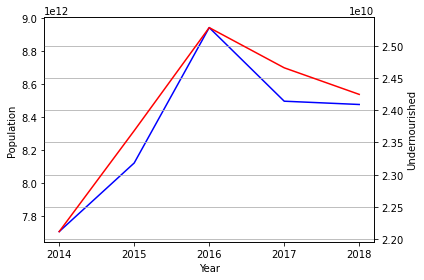

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(kcal['Years'],kcal[0],color="blue")
ax1.set_xlabel("Year")
ax1.set_ylabel("Population")

ax2 = ax1.twinx()
ax2.plot(prot['Years'],prot[0],color="red")
ax2.set_ylabel("Undernourished")

fig.tight_layout()  # othpopulation")
plt.xticks(np.arange(2014,2019,1))
plt.grid()
plt.show()

### Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et  exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [134]:
df_produits_vegetaux['Avail_energy_poids'] = df_produits_vegetaux['energy_poids']*df_produits_vegetaux['Domestic supply quantity']*1000*1000

In [135]:
df_produits_vegetaux['Avail_prot_pour'] = df_produits_vegetaux['prot_pour']*df_produits_vegetaux['Domestic supply quantity']*10*1000

In [136]:
df_produits_vegetaux.groupby('Years').sum()['Avail_prot_pour']

Years
2014    1.705851e+11
2015    1.775478e+11
2016    1.847053e+11
2017    1.868730e+11
2018    1.853710e+11
Name: Avail_prot_pour, dtype: float64

In [137]:
########--------SOURCE--------########
# the recommended mean energy intake for a male population of this age group with a mean height of 1.70 m and 
# a lifestyle with a mean PAL of 1.75, is about 11.7 MJ (2 800 kcal)/day or 195 kJ (47 kcal)/kg/day to maintain 
# an optimum population median BMI of 21.0 (WHO/FAO, 2002), with an individual range of about 11.1 to 12.8 MJ 
# (2 650 to 3 050 kcal)/day or 185 to 200 kJ (44 to 48 kcal)/kg/day to maintain the individual BMI limits of 18.5 to 24.9 (WHO, 2000)


In [138]:
world_pop = df_population.groupby('Years')['Total_value'].sum()*1000
world_pop

Years
2014    7.295556e+09
2015    7.380059e+09
2016    7.464291e+09
2017    7.548142e+09
2018    7.631368e+09
Name: Total_value, dtype: float64

In [139]:
kcal_peryear = 2100*365
df_produits_vegetaux.groupby('Years').sum()['Avail_energy_poids']*100/kcal_peryear/world_pop

Years
2014    126.994961
2015    130.538805
2016    134.726193
2017    134.830651
2018    132.121801
dtype: float64

In [140]:
(df_produits_vegetaux.groupby('Years').sum()['Avail_energy_poids']*100/kcal_peryear/world_pop).mean()

131.84248220976443

Average of 131% people may be feed by all energies of vegetal products by minimum level of energy need 2100kcal per day

In [141]:
prot_peryear = 60*0.365
df_produits_vegetaux.groupby('Years').sum()['Avail_prot_pour']*100/prot_peryear/world_pop

Years
2014    106.767381
2015    109.852856
2016    112.991761
2017    113.047893
2018    110.916284
dtype: float64

In [142]:
(df_produits_vegetaux.groupby('Years').sum()['Avail_prot_pour']*100/prot_peryear/world_pop).mean()

110.715235062909

Average of 110% people may be feed by all protein of vegetal products

### Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [143]:
df_produits_temp['Avail_energy_poids'] = df_produits_temp['energy_poids']*df_produits_temp['Domestic supply quantity']*1000

<ipython-input-143-d7c1e04dcb87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_produits_temp['Avail_energy_poids'] = df_produits_temp['energy_poids']*df_produits_temp['Domestic supply quantity']*1000


In [144]:
df_produits_temp['Avail_prot_pour'] = df_produits_temp['prot_pour']*df_produits_temp['Domestic supply quantity']*10

<ipython-input-144-dd429672ff14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_produits_temp['Avail_prot_pour'] = df_produits_temp['prot_pour']*df_produits_temp['Domestic supply quantity']*10


In [145]:
df_produits_temp.groupby('Years').sum()['Avail_energy_poids']*100/kcal_peryear/world_pop

Years
2014    0.261795
2015    0.268004
2016    0.280272
2017    0.285889
2018    0.276771
dtype: float64

In [146]:
(df_produits_temp.groupby('Years').sum()['Avail_energy_poids']*100/kcal_peryear/world_pop).mean()

0.2745463496195294

Average of 274% people may be feed by all energies of all products by minimum level of energy need 2100kcal per day

In [147]:
df_produits_temp.groupby('Years').sum()['Avail_prot_pour']*100/prot_peryear/world_pop

Years
2014    0.237126
2015    0.243178
2016    0.246503
2017    0.252236
2018    0.250079
dtype: float64

In [148]:
(df_produits_temp.groupby('Years').sum()['Avail_prot_pour']*100/prot_peryear/world_pop).mean()

0.24582429882770862

Average of 245% people may be feed by all protein of all products

### Combien d'humains pourraient être nourris si toute la disponibilité alimentaire en produits végétaux (Food), la nourriture végétale destinée aux animaux (Feed) et les pertes de produits végétaux (Waste) étaient utilisés pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale

In [149]:
df_produits_food = df_produits_temp[df_produits_temp['Category']=="Vegetal product"][['Years','Area','Product','Domestic supply quantity','Food']].copy()
df_produits_food = df_produits_food.groupby(['Years','Product']).sum()

df_produits_food = df_produits_food.merge(df_prod_calculated[['Years','Product','energy_poids','prot_pour']],on = ['Years','Product'])

df_produits_food['Avail_energy_poids'] = df_produits_food['Domestic supply quantity']*df_produits_food['energy_poids']*1000*1000
df_produits_food['Avail_prot_pour'] = df_produits_food['Domestic supply quantity']*df_produits_food['prot_pour']*1000*1000/100
df_produits_food = df_produits_food.groupby('Years')[['Avail_energy_poids','Avail_prot_pour']].sum().reset_index()
df_produits_food #['Avail_prot_pour']*100/prot_peryear/df_produits_food['Population']

,Years,Avail_energy_poids,Avail_prot_pour
0,2014,5.495324e+15,1.090983e+11
1,2015,5.374388e+15,1.122095e+11
2,2016,5.555543e+15,1.158919e+11
3,2017,6.320875e+15,1.229002e+11
4,2018,6.152438e+15,1.236634e+11


In [150]:
df_produits_feed = df_produits_temp[df_produits_temp['Category']=="Vegetal product"][['Years','Area','Product','Domestic supply quantity','Feed']].copy()
df_produits_feed = df_produits_feed.groupby(['Years','Product']).sum()

df_produits_feed = df_produits_feed.merge(df_prod_calculated[['Years','Product','energy_poids','prot_pour']],on = ['Years','Product'])

df_produits_feed['Avail_energy_poids'] = df_produits_feed['Domestic supply quantity']*df_produits_feed['energy_poids']*1000*1000
df_produits_feed['Avail_prot_pour'] = df_produits_feed['Domestic supply quantity']*df_produits_feed['prot_pour']*1000*1000/100
df_produits_feed = df_produits_feed.groupby('Years')[['Avail_energy_poids','Avail_prot_pour']].sum().reset_index()
df_produits_feed

,Years,Avail_energy_poids,Avail_prot_pour
0,2014,5.495324e+15,1.090983e+11
1,2015,5.374388e+15,1.122095e+11
2,2016,5.555543e+15,1.158919e+11
3,2017,6.320875e+15,1.229002e+11
4,2018,6.152438e+15,1.236634e+11


In [151]:
df_produits_losses = df_produits_temp[df_produits_temp['Category']=="Vegetal product"][['Years','Area','Product','Domestic supply quantity','Feed']].copy()
df_produits_losses = df_produits_losses.groupby(['Years','Product']).sum()

df_produits_losses = df_produits_losses.merge(df_prod_calculated[['Years','Product','energy_poids','prot_pour']],on = ['Years','Product'])

df_produits_losses['Avail_energy_poids'] = df_produits_losses['Domestic supply quantity']*df_produits_losses['energy_poids']*1000*1000
df_produits_losses['Avail_prot_pour'] = df_produits_losses['Domestic supply quantity']*df_produits_losses['prot_pour']*1000*1000/100
df_produits_losses = df_produits_losses.groupby('Years')[['Avail_energy_poids','Avail_prot_pour']].sum().reset_index()
df_produits_losses

,Years,Avail_energy_poids,Avail_prot_pour
0,2014,5.495324e+15,1.090983e+11
1,2015,5.374388e+15,1.122095e+11
2,2016,5.555543e+15,1.158919e+11
3,2017,6.320875e+15,1.229002e+11
4,2018,6.152438e+15,1.236634e+11


In [152]:
df_prod_lost = pd.concat([df_produits_food,df_produits_feed,df_produits_losses],axis=0)
df_prod_lost = df_prod_lost.groupby('Years').sum()

df_prod_lost['Population'] = world_pop

df_prod_lost['Avail_energy_poids_per_person'] = df_prod_lost['Avail_energy_poids']*100/kcal_peryear/df_prod_lost['Population']
df_prod_lost['Avail_prot_pour_per_person'] = df_prod_lost['Avail_prot_pour']*100/prot_peryear/df_prod_lost['Population']
df_prod_lost

,Avail_energy_poids,Avail_prot_pour,Population,Avail_energy_poids_per_person,Avail_prot_pour_per_person
Years,,,,,
2014,1.648597e+16,3.272948e+11,7.295556e+09,294.811228,204.850279
2015,1.612316e+16,3.366286e+11,7.380059e+09,285.021906,208.279746
2016,1.666663e+16,3.476756e+11,7.464291e+09,291.304394,212.687257
2017,1.896263e+16,3.687006e+11,7.548142e+09,327.752698,223.043570
2018,1.845731e+16,3.709902e+11,7.631368e+09,315.539641,221.981087


This means that all the vegetal products of food,feed and waste products can feed around 300% of population by energie or around 200% of population by protein

### Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale

In [153]:
df_produits_temp.columns

Index(['Years', 'Area', 'Product', 'Category', 'Sub_category',
       'Domestic supply quantity', 'Export Quantity',
       'Fat supply quantity (kg/capita/yr)', 'Feed', 'Food',
       'Food supply (kcal/capita/yr)', 'Food supply quantity (kg/capita/yr)',
       'Import Quantity', 'Losses', 'Other uses (non-food)', 'Processing',
       'Production', 'Protein supply quantity (kg/capita/yr)', 'Residuals',
       'Seed', 'Stock Variation', 'Tourist consumption', 'energy_poids',
       'prot_pour', 'Avail_energy_poids', 'Avail_prot_pour'],
      dtype='object')

In [154]:
df_produits_all = df_produits_temp[['Product','Years', 'Area','Domestic supply quantity']].groupby(['Product','Years'], as_index=False).sum()

df_produits_all = df_produits_all.merge(df_prod_calculated[['Years','Product','energy_poids','prot_pour']],on = ['Years','Product'])

df_produits_all['Avail_energy_poids'] = df_produits_all['Domestic supply quantity']*df_produits_all['energy_poids']*1000*1000
df_produits_all['Avail_prot_pour'] = df_produits_all['Domestic supply quantity']*df_produits_all['prot_pour']*1000*1000/100


df_produits_all = df_produits_all.groupby('Years').sum()[['Avail_energy_poids','Avail_prot_pour']]

df_produits_all['Population'] = world_pop

df_produits_all['Avail_energy_poids_per_person'] = df_produits_all['Avail_energy_poids']*100/kcal_peryear/df_produits_all['Population']
df_produits_all['Avail_prot_pour_per_person'] = df_produits_all['Avail_prot_pour']*100/prot_peryear/df_produits_all['Population']
df_produits_all

,Avail_energy_poids,Avail_prot_pour,Population,Avail_energy_poids_per_person,Avail_prot_pour_per_person
Years,,,,,
2014,1.498725e+16,4.133062e+11,7.295556e+09,268.010175,258.683914
2015,1.537741e+16,4.291779e+11,7.380059e+09,271.838605,265.542105
2016,1.594986e+16,4.417747e+11,7.464291e+09,278.776550,270.251509
2017,1.687509e+16,4.553176e+11,7.548142e+09,291.671439,275.442066
2018,1.679535e+16,4.564033e+11,7.631368e+09,287.127340,273.087788


In [155]:
df_produits_all.mean()

Avail_energy_poids               1.599699e+16
Avail_prot_pour                  4.391959e+11
Population                       7.463883e+09
Avail_energy_poids_per_person    2.794848e+02
Avail_prot_pour_per_person       2.686015e+02
dtype: float64

So a mean of 279% of population by kcal or 268% of population by protein can be feed by all products nutritions.

### Quelle proportion de la population mondiale est considérée comme étant en sous-nutrition ?

In [156]:
df_undernourished_copy = df_undernourished.copy()
df_undernourished_copy = df_undernourished_copy.groupby('Years',as_index=False).sum()[['Years','Total_value']]
df_undernourished_copy['Total_value'] = df_undernourished_copy['Total_value']*1000000
df_undernourished_copy.rename(columns={"Total_value":"Undernourished"},inplace=True)
df_undernourished_copy['Population'] = world_pop.reset_index()['Total_value']
df_undernourished_copy['Pour_undernourished'] = df_undernourished_copy['Undernourished']*100/df_undernourished_copy['Population']
df_undernourished_copy

,Years,Undernourished,Population,Pour_undernourished
0,2014,524600000.0,7.295556e+09,7.190679
1,2015,525700000.0,7.380059e+09,7.123249
2,2016,529600000.0,7.464291e+09,7.095115
3,2017,536700000.0,7.548142e+09,7.110359
4,2018,545200000.0,7.631368e+09,7.144198


Every year there atleast 7% of undernourished population in world

### Retrouver dans les données des bilans alimentaires les informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition.

In [157]:
area_undernourished = set(df_undernourished['Area'].copy())
area_undernourished

{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Bangladesh',
 'Barbados',
 'Belize',
 'Benin',
 'Bolivia (Plurinational State of)',
 'Botswana',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Chad',
 'Chile',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Cyprus',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Guatemala',
 'Guyana',
 'Haiti',
 'Honduras',
 'India',
 'Indonesia',
 'Iran (Islamic Republic of)',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kenya',
 'Kiribati',
 'Kyrgyzstan',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'New Caledonia',
 'Nicaragua',
 'Nigeria',
 'North Macedonia',
 'Oman',
 'Pakist

In [158]:
df_report = df_produits.copy()[df_produits['Area']!='World'][['Area','Product','Information','Total_value']]
df_report

,Area,Product,Information,Total_value
0,Armenia,"""Potatoes and products""",Food supply quantity (kg/capita/yr),34.19000
1,Armenia,"""Potatoes and products""",Food supply (kcal/capita/yr),23360.00000
2,Armenia,"""Potatoes and products""",Protein supply quantity (kg/capita/yr),0.54750
3,Armenia,"""Potatoes and products""",Fat supply quantity (kg/capita/yr),0.03285
4,Armenia,"""Potatoes and products""",Stock Variation,-50.00000
...,...,...,...,...
909935,China,"""Rice and products""",Production,208240.00000
909936,China,"""Rice and products""",Feed,13500.00000
909937,China,"""Rice and products""",Seed,6955.00000
909938,China,"""Rice and products""",Import Quantity,4540.00000


### Repérer les 15 produits les plus exportés par ce groupe de pays

In [159]:
df_report_export = df_report[df_report['Area'].isin(area_undernourished)&df_report['Information'].str.contains('Export')]
df_report_export = df_report_export.groupby('Product').sum().reset_index()
df_report_export = df_report_export[['Product','Total_value']].sort_values(by='Total_value',ascending=False).head(15)
df_report_export

,Product,Total_value
41,"""Maize and products""",265743.00
74,"""Rice and products""",263624.00
59,"""Palm Oil""",214150.00
95,"""Wheat and products""",210996.00
12,"""Cassava and products""",188307.00
84,"""Sugar (Raw Equivalent)""",130681.00
4,"""Bananas""",91519.00
82,"""Soyabeans""",81070.00
94,"""Vegetables, Other""",73204.00
32,"""Fruits, Other""",71079.00


### Parmi les données des bilans alimentaires au niveau mondial, sélectionner les 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné sur l'année choisie)

In [160]:
df_report_import = df_produits.copy()[df_produits['Area']!='World'][['Years','Area','Product','Information','Total_value']]
df_report_import = df_report_import[df_report_import['Years']==2018]
df_report_import = df_report_import[df_report_import['Information'].str.contains('Import')]

df_report_import[df_report_import['Product'].isin(df_report_export['Product'])].sort_values(by='Total_value',ascending=False)[:200]

,Years,Area,Product,Information,Total_value
903401,2018,China,"""Soyabeans""",Import Quantity,90707.00
903200,2018,China,"""Cassava and products""",Import Quantity,25205.00
513239,2018,Mexico,"""Maize and products""",Import Quantity,17279.00
396839,2018,Japan,"""Maize and products""",Import Quantity,15819.00
851997,2018,Viet Nam,"""Maize and products""",Import Quantity,10475.00
...,...,...,...,...,...
735875,2018,Tajikistan,"""Wheat and products""",Import Quantity,1133.00
591609,2018,Norway,"""Pelagic Fish""",Import Quantity,1129.76
171897,2018,Azerbaijan,"""Wheat and products""",Import Quantity,1128.00
364444,2018,Ireland,"""Wheat and products""",Import Quantity,1123.00


### Grouper ces importations par produit, et calculer pour chaque produit : <br>
* Le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.<br>
* Le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale
+ humaine)<br>
* Top 3 des produits qui ont la plus grande valeur pour chacun des 2 ratios

In [161]:
need_info = ['Domestic supply quantity', 'Export Quantity',
        'Feed', 'Food','Import Quantity', 'Other uses (non-food)']

In [162]:
df_report_all_import = df_produits.copy()[df_produits['Area']!='World']
df_report_all_import = df_report_all_import[df_report_all_import['Years']==2018]
df_report_all_import = df_report_all_import[df_report_all_import['Information'].isin(need_info)&df_report_all_import['Product'].isin(df_report_export['Product'])][['Area','Product','Information','Total_value']]

df_report_all_import = df_report_all_import.groupby(['Product','Information'],as_index=False).sum()
df_report_all_import

,Product,Information,Total_value
0,"""Bananas""",Domestic supply quantity,111803.0
1,"""Bananas""",Export Quantity,24324.0
2,"""Bananas""",Feed,1123.0
3,"""Bananas""",Food,89529.0
4,"""Bananas""",Import Quantity,22297.0
...,...,...,...
84,"""Wheat and products""",Export Quantity,234241.0
85,"""Wheat and products""",Feed,114562.0
86,"""Wheat and products""",Food,499362.0
87,"""Wheat and products""",Import Quantity,217897.0


In [163]:
df_report_all_import_pivot = pd.pivot(data=df_report_all_import,index='Product',columns=['Information'],values=['Total_value']).reset_index()
# df_report_all_import_pivot = df_report_all_import_pivot.reset_index()
df_report_all_import_pivot.columns = ['Product','Domestic supply quantity','Export Quantity','Feed','Food','Import Quantity','Other uses (non-food)']
df_report_all_import_pivot

,Product,Domestic supply quantity,Export Quantity,Feed,Food,Import Quantity,Other uses (non-food)
0,"""Bananas""",111803.00,24324.00,1123.00,89529.00,22297.00,69.0
1,"""Barley and products""",133195.00,46842.00,79243.00,7931.00,42659.00,1738.0
2,"""Cassava and products""",255007.00,29096.00,90976.00,114007.00,35319.00,26469.0
3,"""Fruits, Other""",222972.00,32610.00,176.00,199522.00,31326.00,80.0
4,"""Maize and products""",1110694.00,179778.00,650168.00,139655.00,175385.00,199885.0
5,"""Milk - Excluding Butter""",829514.00,76467.00,66142.00,590119.00,60826.00,3970.0
6,"""Oilcrops Oil, Other""",14990.00,14520.00,0.00,6099.00,13804.00,9762.0
7,"""Palm Oil""",68967.00,48533.00,49.00,17051.00,46828.00,38511.0
8,"""Pelagic Fish""",42861.93,23552.77,19295.35,22980.97,29747.61,475.6
9,"""Pineapples and products""",24693.00,8710.00,NaN,21984.00,5708.00,0.0


In [164]:
df_report_all_import_pivot['Other / Domestic'] = round(df_report_all_import_pivot['Other uses (non-food)']*100/df_report_all_import_pivot['Domestic supply quantity'],2)
df_report_all_import_pivot['Feed / Food'] = round(df_report_all_import_pivot['Feed']*100/df_report_all_import_pivot['Food'],2)
df_report_all_import_pivot

,Product,Domestic supply quantity,Export Quantity,Feed,Food,Import Quantity,Other uses (non-food),Other / Domestic,Feed / Food
0,"""Bananas""",111803.00,24324.00,1123.00,89529.00,22297.00,69.0,0.06,1.25
1,"""Barley and products""",133195.00,46842.00,79243.00,7931.00,42659.00,1738.0,1.30,999.16
2,"""Cassava and products""",255007.00,29096.00,90976.00,114007.00,35319.00,26469.0,10.38,79.80
3,"""Fruits, Other""",222972.00,32610.00,176.00,199522.00,31326.00,80.0,0.04,0.09
4,"""Maize and products""",1110694.00,179778.00,650168.00,139655.00,175385.00,199885.0,18.00,465.55
5,"""Milk - Excluding Butter""",829514.00,76467.00,66142.00,590119.00,60826.00,3970.0,0.48,11.21
6,"""Oilcrops Oil, Other""",14990.00,14520.00,0.00,6099.00,13804.00,9762.0,65.12,0.00
7,"""Palm Oil""",68967.00,48533.00,49.00,17051.00,46828.00,38511.0,55.84,0.29
8,"""Pelagic Fish""",42861.93,23552.77,19295.35,22980.97,29747.61,475.6,1.11,83.96
9,"""Pineapples and products""",24693.00,8710.00,NaN,21984.00,5708.00,0.0,0.00,NaN


In [165]:
df_report_all_import_pivot[['Product','Other / Domestic']].sort_values(by='Other / Domestic',ascending=False).head(3)

,Product,Other / Domestic
6,"""Oilcrops Oil, Other""",65.12
7,"""Palm Oil""",55.84
4,"""Maize and products""",18.00


In [166]:
df_report_all_import_pivot[['Product','Feed / Food']].sort_values(by='Feed / Food',ascending=False).head(3)

,Product,Feed / Food
1,"""Barley and products""",999.16
4,"""Maize and products""",465.55
11,"""Soyabeans""",221.81


### Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10% ?

In [167]:
production_usa_animal = df_produits[(df_produits['Information'].str.contains('Feed'))&(df_produits['Years']==2018)&(df_produits['Sub_category'].str.contains("Cereal"))].copy()
production_usa_animal = production_usa_animal[production_usa_animal['Area']!="World"]
production_usa_animal = production_usa_animal.groupby('Area',as_index=False).sum()[['Area','Total_value']]
production_usa_animal['Total_value'] = production_usa_animal['Total_value'] *1000
production_usa_animal = production_usa_animal[production_usa_animal['Area']=='United States of America']
production_usa_animal

,Area,Total_value
161,United States of America,142114000.0


In [168]:
print("If USA reduces their production of feed cereal by 10%, it may realease {} million of cereals".format(production_usa_animal['Total_value'].iloc[0]*0.1/1000000))

If USA reduces their production of feed cereal by 10%, it may realease 14.2114 million of cereals


### Parmi les documents sur les Bilans alimentaires, il y a des informations redondantes. En effet, pour un pays donné, certaines de ces informations peuvent se calculer à partir d'autres : <br>
● Production (Production)<br>
● Importations (Import Quantity)<br>
● Exportations (Export Quantity)<br>
● Variation de stock (Stock Variation)<br>
● Disponibilité intérieure (Domestic supply)<br>
● Semences (Seed)<br>
● Pertes (Waste)<br>
● Nourriture (Food), aussi appelée Disponibilité alimentaire (Food Supply)<br>
● Aliments pour animaux (Feed)<br>
● Traitement (Processing)<br>
● Autres utilisations (Other uses)<br>
=> Identifiez ces redondances en donnant votre réponse sous forme de formule mathématique). Illustrez cette
relation avec l'exemple du blé en France

In [169]:
#Les blé Francais pour l'année 2018

df_ble = df_produits[df_produits['Product'].str.contains('Wheat')]
df_ble = df_ble[df_ble['Area'].str.contains('France') & (df_ble['Years']==2018)]
# df_ble
ble_french = pd.pivot(data = df_ble, index = 'Product', columns = 'Information', values = 'Total_value')
ble_french

Information,Domestic supply quantity,Export Quantity,Fat supply quantity (kg/capita/yr),Feed,Food,Food supply (kcal/capita/yr),Food supply quantity (kg/capita/yr),Import Quantity,Losses,Other uses (non-food),Processing,Production,Protein supply quantity (kg/capita/yr),Residuals,Seed,Stock Variation
Product,,,,,,,,,,,,,,,,
"""Wheat and products""",19521.0,20446.0,1.4965,7599.0,7779.0,317915.0,116.22,2349.0,326.0,1149.0,1960.0,35798.0,10.22365,0.0,708.0,-1819.0


In [170]:
Total_ble_french = ble_french['Domestic supply quantity'][0]
Equation = ble_french['Feed'][0]+ble_french['Food'][0]+ble_french['Losses'][0]+ble_french['Seed'][0]+ble_french['Processing'][0]+ble_french['Other uses (non-food)'][0]

In [171]:
print("The equations gives: {}".format(Equation))
print("Domestic supply gives: {}".format(Total_ble_french))

The equations gives: 19521.0
Domestic supply gives: 19521.0


In [172]:
df_ble[['Years','Area','Product','Information','Total_value']]

,Years,Area,Product,Information,Total_value
235246,2018,France,"""Wheat and products""",Food supply quantity (kg/capita/yr),116.22000
235247,2018,France,"""Wheat and products""",Food supply (kcal/capita/yr),317915.00000
235248,2018,France,"""Wheat and products""",Protein supply quantity (kg/capita/yr),10.22365
235249,2018,France,"""Wheat and products""",Fat supply quantity (kg/capita/yr),1.49650
235250,2018,France,"""Wheat and products""",Stock Variation,-1819.00000
235251,2018,France,"""Wheat and products""",Losses,326.00000
235252,2018,France,"""Wheat and products""",Processing,1960.00000
235253,2018,France,"""Wheat and products""",Food,7779.00000
235254,2018,France,"""Wheat and products""",Other uses (non-food),1149.00000
235255,2018,France,"""Wheat and products""",Residuals,0.00000
